# Dataset 과 DataLoader

- 딥러닝 모델을 학습시키고 평가할때 사용할 데이터를 제공하기 위한 객체
- **torch.utils.data.Dataset**
    - input/output dataset을 저장한다.
        - data augmentation등 처리를 할 수 있다.
    - subscriptable, iterable 타입. 
    > subscriptable타입: indexing을 이용해 원소 조회가 가능한 타입)
        
- **torch.utils.data.DataLoader**
    - Dataset의 데이터를 제공하는 Iterable 객체.
    - Dataset이 가지고 있는 데이터를 어떻게 제공할 지 설정한다.
        - batch size 등을 설정한다.

# Built-in Dataset

- 파이토치는 분야별 공개 데이터셋을 종류별로 torchvision, torchtext, torchaudio 모듈을 통해 제공한다.
- 모든 built-in dataset은 [`torch.utils.data.Dataset`](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset)의 하위클래스로 구현되있다.
    - [computer vision dataset](https://pytorch.org/vision/stable/datasets.html)
    - [text dataset](https://pytorch.org/text/stable/datasets.html)
    - [audio dataset](https://pytorch.org/audio/stable/datasets.html)

## Image  Built-in dataset Loading
torchvision 모듈을 통해 다양한 오픈소스 이미지 데이터셋을 loading할 수 있는 Dataset 클래스를 제공한다.

- 각 Dataset 클래스의 주요 매개변수
    - **root**: str
        - Raw data를 저장할 디렉토리 경로
    - **train**: bool
        - True일경우 Train set을 False일 경우 Test set을 load
    - **download**: bool
        - True이면 root에 지정된 경로에 raw 데이터를 인터셋에서 download할지 여부. 이미 저장되 있는 경우 download하지 않는다.
    - **transform**: function
        - Loading한 이미지를 변환하는 function.
            - Normalization이나 data Agumentation 처리를 한다.
            

In [2]:
import torch
import torch.nn as nn
from torchvision import datasets

import numpy as np

In [5]:
# 데이터 저장할 디렉토리 경로 변수
DATASET_PATH = 'datasets'  #상대경로, 절대경로 상관없다.

mnist_trainset = datasets.MNIST(root=DATASET_PATH, #원본데이터가 위치한 디렉토리.
                                train=True, # True: Train set , False: Test set
                                download=True # root경로에 데이터셋이 없을 경우 다운로드 받을지 여부(default: False)
#                                 , transform=데이터변환함수
                               )
mnist_testset = datasets.MNIST(root=DATASET_PATH, 
                               train=False, 
                               download=True
                              )

In [7]:
# 타입확인
type(mnist_trainset), isinstance(mnist_trainset, torch.utils.data.Dataset) # 상속관계

(torchvision.datasets.mnist.MNIST, True)

In [9]:
## built-in dataset 정보확인
print(mnist_trainset)
print(mnist_testset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
Dataset MNIST
    Number of datapoints: 10000
    Root location: datasets
    Split: Test


In [19]:
# MNIST Dataset 정보확인
print("trainset 데이터개수:", len(mnist_trainset))
print("testset 데이터개수:", len(mnist_testset))
# Dataset->subscriptable->indexing
# 1개 데이터를 조회
data_1 = mnist_trainset[10500]  #타입: tuple, (X, y)
print(type(data_1), len(data_1))
# input data type
print(type(data_1[0]), type(data_1[1]))
print(data_1[1])
data_1[0]


trainset 데이터개수: 60000
testset 데이터개수: 10000
<class 'tuple'> 2
<class 'PIL.Image.Image'> <class 'int'>
1


(28, 28)


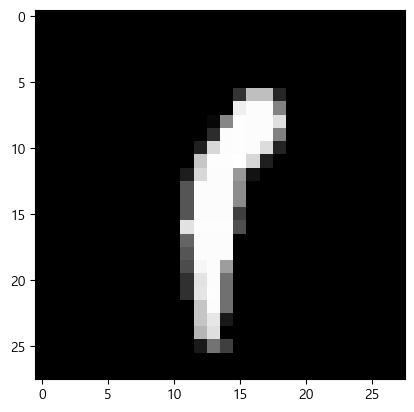

In [23]:
# PIL.Image => ndarray
import matplotlib.pyplot as plt
img_arr = np.array(data_1[0])
print(img_arr.shape)
plt.imshow(img_arr, cmap='gray');

In [26]:
## built-in Dataset은 slicing은 안됨.
# mnist_trainset[:5]

In [27]:
# 분류->Y의 클래스들 확인 
mnist_trainset.classes
# 리스트: index-class, value-class name

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [29]:
mnist_trainset.class_to_idx
# dictionary: key-class name, value-class

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

In [30]:
mnist_trainset.class_to_idx['5 - five']

5

In [36]:
np.array(data_1[0]).shape

(28, 28)

In [38]:
data_1[0].size  # width, height만 알려준다. (channel은 안알려줌.)

(28, 28)

In [39]:
# mnist_trainset.data  # 전체 input data가 저장된 속성
mnist_trainset.data.shape

torch.Size([60000, 28, 28])

In [41]:
# mnist_trainset.targets # 전체 output data가 저장된 속성\
mnist_trainset.targets.shape

torch.Size([60000])

### TODO

- CIFAR10 Built-in dataset 을 LOADING 후 다음을 확인하시오.
    1. Dataset loading
    1. train, test dataset의 데이터 개수
    1. train set 과 test set의 input data의  shape
    1. train set 과 test set의 output data의  shape
    1. class index - class name
    1. train set의 이미지 5장을 출력. label의 이름을 title로 출력.
    
    

In [42]:
# 1.Dataset loading
cifar10_trainset = datasets.CIFAR10(root=DATASET_PATH, train=True, download=True)
cifar10_testset = datasets.CIFAR10(root=DATASET_PATH, train=False, download=True)

100.0%


Extracting datasets\cifar-10-python.tar.gz to datasets
Files already downloaded and verified


In [44]:
# 2. train, test dataset의 데이터 개수
print(cifar10_trainset)
print(cifar10_testset)
print(len(cifar10_trainset), len(cifar10_testset))

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: datasets
    Split: Train
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: datasets
    Split: Test
50000 10000


In [56]:
# train set 과 test set의 input data의 shape
print(cifar10_trainset.data.shape)
print(cifar10_testset.data.shape)
# print(type(cifar10_trainset.data))
# train set 과 test set의 output data의 shape
print(type(cifar10_trainset.targets))
print(len(cifar10_trainset.targets), np.shape(cifar10_trainset.targets))
print(len(cifar10_testset.targets), np.shape(cifar10_testset.targets))

(50000, 32, 32, 3)
(10000, 32, 32, 3)
<class 'list'>
50000 (50000,)
10000 (10000,)


In [57]:
#5. class index - class name

# class->class name
cifar10_trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [59]:
cifar10_trainset.classes[9]

'truck'

In [60]:
# class name -> class
cifar10_trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [61]:
cifar10_trainset.class_to_idx['bird']

2

<class 'PIL.Image.Image'> <class 'int'>
9 truck


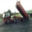

In [90]:
#6. 이미지 출력
idx = 2
data = cifar10_trainset[idx]
print(type(data[0]), type(data[1]))
print(data[1], cifar10_trainset.classes[data[1]])
data[0]

6 frog


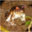

9 truck


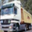

9 truck


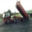

4 deer


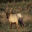

1 automobile


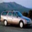

In [75]:
from IPython.display import display
for i in range(5):
    x, y = cifar10_trainset[i]  #튜플 대입
    print(y, cifar10_trainset.classes[y])
    display(x)

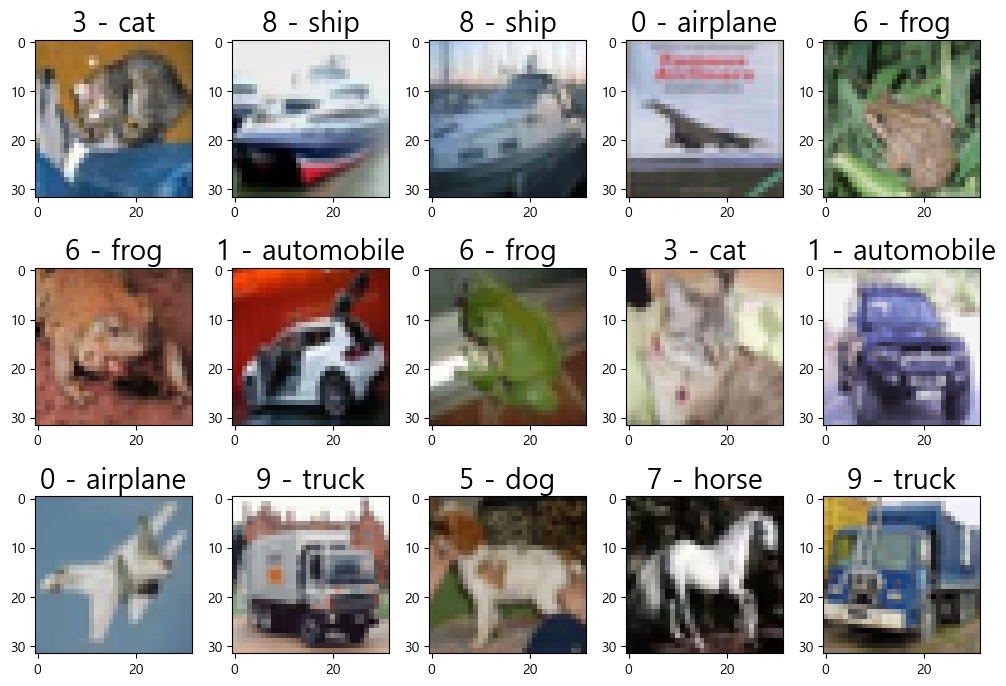

In [89]:
#matplotlib
plt.figure(figsize=(10, 7))
for i in range(15):
    x, y = cifar10_testset[i]
    # x: PIL.Image -> ndarray
    img = np.array(x)
#     print(img.shape, img.dtype)
    plt.subplot(3, 5, i+1)
    plt.title(f"{y} - {cifar10_testset.classes[y]}")
    plt.imshow(img)
    
plt.tight_layout()
plt.show()
    

### transform 매개변수를 이용한 정규화

- Feature scaling과 동일한 목적으로 image의 전체 pixel의 값들이 유사한 scale을 가지도록 처리한다.
- transform 매개변수에 전처리 함수를 넣으면 데이터에 대한 전처리를 할 수 있다.

In [99]:
d_1 = mnist_trainset[0][0]
print(type(d_1))
img_1 = np.array(d_1)
print(img_1.shape, img_1.max(), img_1.min(), img_1.dtype)

<class 'PIL.Image.Image'>
(28, 28) 255 0 uint8


#### ToTensor
 -  PIL Image나 NumPy ndarray 를 FloatTensor 로 변환하고, 이미지의 픽셀의 크기(intensity) 값을 \[0., 1.\] 범위로 비례하여 조정한다.
 - color이미지 의 경우 channel 축을 0축으로 설정. (hight, width, channel) -> (channel, height, width)
 - https://pytorch.org/vision/stable/transforms.html

In [100]:
from torchvision import transforms  # 영상 데이터 전처리를 위한 transforms들을 제공하는 모듈
mnist_trainset_2 = datasets.MNIST(root=DATASET_PATH, train=True, download=True, 
                                  transform=transforms.ToTensor())  #ToTensor: 클래스

In [102]:
x, y = mnist_trainset_2[0]

In [103]:
print(type(x), type(y))

<class 'torch.Tensor'> <class 'int'>


In [105]:
print(x.shape)  # channel 축이 생성. (channel, height, width)
print(x.max(), x.min(), x.dtype) # max: 255->1, min: 0->0, dtype: uint8->float32

torch.Size([1, 28, 28])
tensor(1.) tensor(0.) torch.float32


### transform.Normalize
- 채널별로 지정한 평균을 뺀 뒤 지정한 표준편차로 나워서 정규화를 진행한다.
- ToTensor()로 변환된 데이터를 받아서 추가 변환
        - 여려 변환을 할 경우 `torchvision.transforms.Compose` 클래스를 이용한다.

In [106]:
#평균: 0.5, 표준편차: 0.5 -> 0 ~ 1 값을 변환
(0-0.5)/0.5  , (1-0.5)/0.5

(-1.0, 1.0)

In [ ]:
# 0 ~ 1 변환
# 채널별(RGB)로 평균: (0.485, 0.456, 0.406), 표준편차: (0.229, 0.224, 0.225)

In [122]:
# Compose(): 여러 transform들을 묶어서 등록한 순서대로 실행시켜준다.
transform = transforms.Compose([transforms.ToTensor(), # 0 ~ 1 로 정규화 (+torch.Tensor()변환, channel first)
                                transforms.Normalize(mean=(0.5, ), std=(0.5, ))  #평균, 표준편차는 채널별로 설정
                               ])


mnist_trainset_3 = datasets.MNIST(root=DATASET_PATH, train=True, download=True, 
                                 transform=transform)
mnist_testset_3 = datasets.MNIST(root=DATASET_PATH, train=False, download=True, 
                                 transform=transform)

In [123]:
a = np.full((28, 28, 1), fill_value=100, dtype='uint8')
print(a.shape)
b = transform(a)
b

(28, 28, 1)


tensor([[[-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157],
         [-0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157, -0.2157,
          -0.2157, -0.2157, -0.2157, -0.2157, -0

In [116]:
# pixcel: 100 -> 0~1(pixcel/255: ToTensor()) -> (p - 평균 )/ 표준편차 : Normalize()
np.round(((100/255)-0.5)/0.5, 4)

-0.2157

In [117]:
b.shape

torch.Size([1, 28, 28])

In [125]:
x, y = mnist_trainset_3[0]
x.min(), x.max()

(tensor(-1.), tensor(1.))

In [ ]:
# transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))

In [170]:
# Normalize 의 평균, 표준편차 설정: 모든 채널에 동일한 값을 지정할 경우 -> 값을 하나만 설정
#                                 채널별로 다른 값을 지정할 겨우 -> 튜플에 채널별로 각각의 값을 설정
transform = transforms.Compose([transforms.ToTensor(), # 0 ~ 1 로 정규화 (+torch.Tensor()변환, channel first)
                                transforms.Normalize(mean=0.5, std=0.5)  #평균, 표준편차는 채널별로 설정
                               ])

cifar10_tainset_2 = datasets.CIFAR10(root=DATASET_PATH, train=True, download=True, 
#                             transform=transforms.ToTensor())
                                     transform=transform)

Files already downloaded and verified


In [171]:
x, y = cifar10_tainset_2[0]
x.shape, x.min(), x.max(), x.dtype

(torch.Size([3, 32, 32]), tensor(-1.), tensor(1.), torch.float32)

In [172]:
x[0].min(), x[0].max()
x[1].min(), x[1].max()
x[2].min(), x[2].max()

(tensor(-1.), tensor(0.8431))

## DataLoader 생성

- DataLoader
    - 모델이 학습하거나 추론할 때 Dataset의 데이터를 모델에 제공해준다. (feeding)
    - initalizer속성
        - dataset: 값을 제공하는 Dataset 타입 객체
        - batch_size: 한번에 값을 제공할 batch 크기
        - shuffle: 에폭마다 데이터셋을 섞을 지 여부 (default: False)
        - drop_last: 마지막 배치의 데이터개수가 batch_size 설정보다 적을 경우 모델에 제공하지 않는다.


In [153]:
from torch.utils.data import DataLoader
mnist_train_loader = DataLoader(dataset=mnist_trainset_3, 
                                batch_size=512, 
                                shuffle=True, 
                                drop_last=True
                               )

In [156]:
# 에폭당 step 수: 1에폭에 몇번 파라미터들을 업데이트하는지
## 전체데이터개수/배치크기 -> 올림
print("에폭당 step수")
print(np.ceil(60000/512), 60000/512)
print(len(mnist_train_loader))

에폭당 step수
118.0 117.1875
117


In [158]:
# DataLoader에서 Dataset 조회
print(type(mnist_train_loader.dataset))
mnist_train_loader.dataset

<class 'torchvision.datasets.mnist.MNIST'>


Dataset MNIST
    Number of datapoints: 60000
    Root location: datasets
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )

In [160]:
# DataLoaer => Iterable
batch_one = next(iter(mnist_train_loader))

In [162]:
type(batch_one) # list [X, y]

list

In [164]:
X = batch_one[0]
y = batch_one[1]

In [165]:
X.shape  #(batch_size,  channel,  height, width)

torch.Size([512, 1, 28, 28])

In [166]:
y.shape

torch.Size([512])

## Custom Dataset 구현

1. `torch.utils.data.Dataset` 클래스를 상속한 클래스를 정의한다.
2. `__init__(self, ...)` 
    - DataSet객체 생성시 필요한 설정들을 초기화 한다. 
    - ex) Data저장 경로, transform 설정 여부 등
3. `__len__(self)`
    - 총 데이터 수를 반환하도록 구현한다.
    - DataLoader가 Batch 생성할 때 사용한다.
4. `__getitem__(self, index)`
    - index의 Data point를 반환한다.
    - input(X), output(y) 를 튜플로 반환한다.
    - transform이 있을 경우 변환처리한 input을 반환한다.

In [184]:
# subscriptable type 의 클래스
class Test:
    
    def __len__(self):
        return 3
    
    def __getitem__(self, idx):
        if idx == 0 or idx == '가':
            return 'A'
        elif idx == 1:
            return 'B'
        elif idx==2:
            return 'C'
        else:
            raise IndexError(f"없는 INDEX입니다. 크기는 {self.__len__()}")

In [188]:
t = Test()
print(len(t))
# print(t[6])
print(t[0], t['가'])

3
A A


In [189]:
for i in t:
    print(i)

A
B
C


# OxfordPet Dataset 생성
- https://www.robots.ox.ac.uk/~vgg/data/pets/
- 개,고양이 37가지 품종
- 품종별로 200장 정도씩 구성됨. (품종별로 이미지 개수는 다르다)

- 목표
    - train: 70%, validation: 20%, test: 10%

In [190]:
# 품종별 데이터 200장
print("train:", 200*0.7, "valid:", 200*0.2, "test: 나머지")

train: 140.0 valid: 40.0 test: 나머지


In [1]:
import os
import re
from glob import glob
import tarfile
from PIL import Image

In [2]:
tar_file_path = "images.tar.gz"
data_root_path = "datasets/oxfordpet"  # 압축풀 디렉토리 경로
os.makedirs(data_root_path, exist_ok=True)

In [ ]:
# from zipfile import ZipFile
# with ZipFile(파일경로) as z:
#     z.extractall(풀경로)

In [230]:
# 압축풀기
with tarfile.open(tar_file_path, "r:gz") as tar:
    tar.extractall(data_root_path)  # data_root_path 경로에 압축을 푼다. (생략하면 현재디렉토리에 품)

In [ ]:
# tar = tarfile.open()
# tar.extractall()
# tar.close()

In [3]:
# 이미지들이 저장되 있는 경로
data_path = os.path.join(data_root_path, 'images')
# 각 이미지의 경로를 리스트로 저장.
data_path

'datasets/oxfordpet\\images'

In [4]:
# os.listdir('datasets/oxfordpet')
# **: 모든 하위 디렉토리 (디렉토리 경로에 넣어준다.
# * : 모든 글자
###### 모든 이미지파일들의 개별 경로
file_list = glob(r"datasets\oxfordpet\**\*.jpg")
len(file_list)

7378

In [222]:
f = file_list[0]
print(f)
print("파일경로에서 확장자를 분리:", os.path.splitext(f))
print("파일경로에서 파일명을 분리:", os.path.basename(f))   # 파일명.확장자
print("파일경로에서 디렉토리 경로를 분리:", os.path.dirname(f))

datasets\oxfordpet\images\Abyssinian_1.jpg
파일경로에서 확장자를 분리: ('datasets\\oxfordpet\\images\\Abyssinian_1', '.jpg')
파일경로에서 파일명을 분리: Abyssinian_1.jpg
파일경로에서 디렉토리 경로를 분리: datasets\oxfordpet\images


In [5]:
file_list[:5]

['datasets\\oxfordpet\\images\\Abyssinian_1.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_10.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_100.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_101.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_102.jpg']

In [233]:
# 이미지들에서 RGB 컬러이미지를 제외한 나머지 색모드 파일들을 제거
remove_cnt = 0 # 몇장 삭제했는지 저장
for idx, image_path in enumerate(file_list):
    # 이미지 읽기 -> PIL.Image 사용
    with Image.open(image_path) as image:
        image_mode = image.mode #str: L - grayscale, 'RGB': rgb, ..
    
    if image_mode != "RGB":
        # 삭제
        os.remove(image_path)
        remove_cnt += 1
        print(f"{idx}번째 이미지 삭제. {os.path.basename(image_path)}, mode: {image_mode}")

136번째 이미지 삭제. Abyssinian_34.jpg, mode: P
148번째 이미지 삭제. Abyssinian_5.jpg, mode: RGBA
2233번째 이미지 삭제. Egyptian_Mau_129.jpg, mode: L
2242번째 이미지 삭제. Egyptian_Mau_139.jpg, mode: P
2243번째 이미지 삭제. Egyptian_Mau_14.jpg, mode: RGBA
2249번째 이미지 삭제. Egyptian_Mau_145.jpg, mode: P
2270번째 이미지 삭제. Egyptian_Mau_167.jpg, mode: P
2279번째 이미지 삭제. Egyptian_Mau_177.jpg, mode: P
2289번째 이미지 삭제. Egyptian_Mau_186.jpg, mode: RGBA
2295번째 이미지 삭제. Egyptian_Mau_191.jpg, mode: P
6899번째 이미지 삭제. staffordshire_bull_terrier_2.jpg, mode: L
6905번째 이미지 삭제. staffordshire_bull_terrier_22.jpg, mode: L


In [226]:
remove_cnt

12

In [6]:
# 삭제후에 파일리스트를 다시 만들기.
file_list = glob(r"datasets\oxfordpet\**\*.jpg")
len(file_list)

7378

### index_to_class, class_to_index 생성
- index_to_class : class들을 가지는 리스트. index(0, 1, ..)로 class 조회
- class_to_index : key: 클래스이름, value: index -> class이름 넣으면 index 반환
- 파일명이 class

In [7]:
class_name_set = set()
# file_list에서 파일명을 추출한 뒤에 class_name_set에 추가.
for path in file_list:

    filename = os.path.basename(path) #'datasets\\oxfordpet\\images\\Abyssinian_1.jpg' -> Abyssinian_1.jpg
    filename2 = os.path.splitext(filename)[0]    # Abyssinian_1.jpg -> (Abyssinian_1,  .jpg)
    class_name = re.sub(r"_\d+", "", filename2)  #Abyssinian_1 => Abyssinian
    class_name_set.add(class_name)

In [8]:
index_to_class = list(class_name_set)
index_to_class.sort()

In [9]:
index_to_class

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [10]:
len(index_to_class)

37

In [11]:
# 클래스이름 -> class(숫자) ==> dictionary
class_to_index = {name:idx for idx, name in  enumerate(index_to_class)}
class_to_index

{'Abyssinian': 0,
 'Bengal': 1,
 'Birman': 2,
 'Bombay': 3,
 'British_Shorthair': 4,
 'Egyptian_Mau': 5,
 'Maine_Coon': 6,
 'Persian': 7,
 'Ragdoll': 8,
 'Russian_Blue': 9,
 'Siamese': 10,
 'Sphynx': 11,
 'american_bulldog': 12,
 'american_pit_bull_terrier': 13,
 'basset_hound': 14,
 'beagle': 15,
 'boxer': 16,
 'chihuahua': 17,
 'english_cocker_spaniel': 18,
 'english_setter': 19,
 'german_shorthaired': 20,
 'great_pyrenees': 21,
 'havanese': 22,
 'japanese_chin': 23,
 'keeshond': 24,
 'leonberger': 25,
 'miniature_pinscher': 26,
 'newfoundland': 27,
 'pomeranian': 28,
 'pug': 29,
 'saint_bernard': 30,
 'samoyed': 31,
 'scottish_terrier': 32,
 'shiba_inu': 33,
 'staffordshire_bull_terrier': 34,
 'wheaten_terrier': 35,
 'yorkshire_terrier': 36}

In [12]:
index_to_class[3], class_to_index['Bombay']

('Bombay', 3)

In [17]:
# 분리
train_index  = int(200 * 0.7)  # trainset 개수
valid_index = train_index + int(200 * 0.2)
print(train_index, valid_index)
print(f"trainset: [0:{train_index}]")
print(f"valid_set: [{train_index}:{valid_index}]")
print(f"test_set: [{valid_index}:]")

140 180
trainset: [0:140]
valid_set: [140:180]
test_set: [180:]


In [18]:
# file_list

In [19]:
# trainset, valid_set, test_set 분리
### 각 dataset에 들어갈 파일들의 경로를 저장할 리스트.

file_list.sort() # 파일경로를 같은 클래스끼리 group 화 되로록 정렬.

train_path_list, valid_path_list, test_path_list = [],  [], []

cnt = 0  # class별 현재 몇번째 데이터인지.
previous_class = "" # 이전 처리한 class의 이름.

for path in file_list:
    # 경로에서 파일명만 추출
    file_name = os.path.splitext(os.path.basename(path))[0]
    class_name = re.sub(r'_\d+', '', file_name)
    
    if previous_class == class_name: #작업중인 class?
        cnt += 1
    else:  # 새로운 class에 대한 작업시작
        cnt = 1
        
    if cnt <= train_index: # 현재 작업하는 cnt가 train index보다 작다면 train set에 들어갈 이미지.
        train_path_list.append(path)
    elif train_index < cnt and valid_index >= cnt: # validation set 에 들어갈 이미지
        valid_path_list.append(path)
    else:
        test_path_list.append(path)
    
    previous_class = class_name # 현재 처리한 파일의 class이름을 previous_class에 설정.
        

In [20]:
len(train_path_list), len(valid_path_list), len(test_path_list)

(5180, 1480, 718)

In [263]:
test_path_list

['datasets\\oxfordpet\\images\\Abyssinian_81.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_82.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_83.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_84.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_85.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_86.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_87.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_88.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_89.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_9.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_90.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_91.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_92.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_93.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_94.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_95.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_96.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_97.jpg',
 'datasets\\oxfordpet\\images\\Abyssinian_98.jpg',
 'datasets\\oxfordpet\\images\\A

In [ ]:
### 사용자 정의 Dataset을 정의
# 1. Dataset을 상속
# 2. __init__() 재정의 -> 필요한 속성값들 초기화.
# 3. __len__() 재정의 -> 총 제공할 데이터의 개수 반환. len() 연동
# 4. __getitem__() 재정의 -> 1개 데이터의 값을 반환. -> (X, y) 튜플을 반환.
#      - X: 경로의 이미지, y: class


In [58]:
from torch.utils.data import Dataset
from PIL import Image
import re

class OxfordPetDataset(Dataset):
    
    def __init__(self, path_list, transform=None):
        self.path_list = path_list
        self.transform = transform
    
    def __len__(self):
        return len(self.path_list)
    
    def __getitem__(self, index):
        # index의 X, y를 반환. 
        # X가 이미지일경우->transform할 경우===> PIL.Image 또는 ndarray로 읽어야 한다.
        path = self.path_list[index]
        img = Image.open(path)
        
        if self.transform:  # != None
            img = self.transform(img)
        fname = os.path.splitext(os.path.basename(path))[0]
        class_name = re.sub(r'_\d+', '', fname)
        class_idx = class_to_index[class_name]
        return img, class_idx

In [66]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224), antialias=True), 
    transforms.ToTensor(), 
])

train_set = OxfordPetDataset(train_path_list, transform=transform)
valid_set = OxfordPetDataset(valid_path_list, transform=transform)
test_set = OxfordPetDataset(test_path_list, transform=transform)

In [67]:
len(train_set), len(valid_set), len(test_set)

(5180, 1480, 718)

In [70]:
x, y = train_set[1030]
print(y)
type(x), x.shape

7


(torch.Tensor, torch.Size([3, 224, 224]))

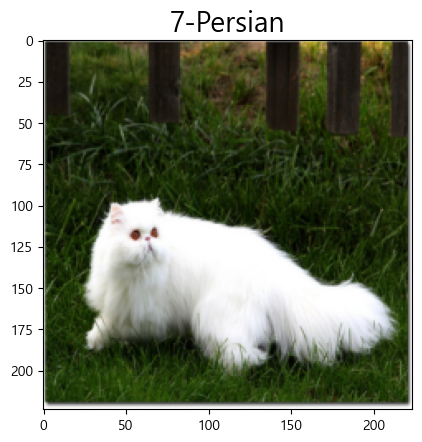

In [73]:
import matplotlib.pyplot as plt
plt.imshow(x.permute(1, 2, 0))
plt.title(f"{y}-{index_to_class[y]}")
plt.show()

In [75]:
from torch.utils.data import DataLoader
train_loader_ox = DataLoader(train_set, 32, True)
valid_loader_ox = DataLoader(valid_set, len(valid_set))
test_loader_ox = DataLoader(test_set, 32)

In [77]:
X_ox, y_ox = next(iter(train_loader_ox))
X_ox.shape, y_ox.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

# Dataset을 이용해 CSV파일에 저장된 데이터셋 로딩

In [79]:
import numpy as np
import pandas as pd

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset

In [83]:
iris = pd.read_csv('iris.data', header=None, 
                  names=['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'target'])
iris.shape

(150, 5)

In [84]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [92]:
index_to_class = iris['target'].unique()
class_to_index = {key:value for value, key in enumerate(index_to_class)}
print(index_to_class)
print(class_to_index)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [93]:
X = iris.drop(columns='target').values
y = iris['target'].values
X.shape, y.shape

((150, 4), (150,))

In [94]:
# Train/Test 분리.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [115]:
# 사용자 정의 Dataset 정의
class IrisDataset(Dataset):
    
    def __init__(self, X, y, mean, std):
        # mean, std => standard scaling을 하기 위해 train set의 평균, 표준편차를 받는다.
        # 모델의 parameter의 dtype인 float32에 맞춘다. 
        self.X = torch.tensor(X, dtype=torch.float32)
        # feature scaling 
        mean = torch.tensor(mean, dtype=torch.float32)
        std = torch.tensor(std, dtype=torch.float32)
        
        self.X = (self.X - mean) / std
        self.y = y

        
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, index):
        X = self.X[index]
        y = class_to_index[self.y[index]]
        return X, y

In [116]:
mean = X_train.mean(axis=0)
std = X_train.std(axis=0)

train_set_ir = IrisDataset(X_train, y_train, mean, std)

In [117]:
len(train_set_ir)
train_set_ir[5]

(tensor([ 2.2651, -0.1667,  1.3050,  1.4314]), 2)

In [ ]:
## TensorDataset
### X, y가 tensor객체로 메모리에 로딩되 있는 경우 사용.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y =  iris['target'].apply(lambda x : class_to_index[x]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
# type(X_train), type(y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [128]:
# ndarray => tensor 
#  TensorDataset(X:torch.Tensor, y:torch.Tensor)
train_set_ir2 = TensorDataset(torch.tensor(X_train_scaled, dtype=torch.float32), 
                              torch.tensor(y_train, dtype=torch.float32))

In [129]:
len(train_set_ir2)

112

In [132]:
train_set_ir2[6]

(tensor([ 0.6867, -0.8605,  0.8799,  0.9161]), tensor(2.))

## torchvision.datasets.ImageFolder 이용
- 저장장치에 파일로 저장된 image들을 쉽게 로딩할 수 있도록 한다.
- train/validation/test 데이터셋을 저장하는 디렉토리에 class 별로 디렉토리를 만들고 이미지를 저장한다.

In [133]:
!pip install gdown --upgrade

  Using cached gdown-4.7.1-py3-none-any.whl (15 kB)
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached PySocks-1.7.1-py3-none-any.whl (16 kB)


In [ ]:

import os
from zipfile import ZipFile
import gdown
def down_extract():
    os.makedirs('data', exist_ok=True)
    url = 'https://drive.google.com/uc?id=1YIxDL0XJhhAMdScdRUfDgccAqyCw5-ZV'
    fname = 'data/cats_and_dogs_small.zip'

    gdown.download(url, fname, quiet=False)
    
    #zipfile모듈: Zip 압축파일을 다루는 모듈(압축하기, 풀기)
    from zipfile import ZipFile
    # 압축풀기: ZipFile(압축파일경로).extractall(풀경로) # 디렉토리 없으면 생성해 준다.
    with ZipFile(fname) as zipFile:
        zipFile.extractall(os.path.join('data','cats_and_dogs_small'))
        
down_extract()        